## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made.

In [1]:

import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There is 1 csv file in the current version of the dataset:


"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/tourism.csv

In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# tourism.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('tourism.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'tourism.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 61 rows and 7 columns


Let's take a quick look at what the data looks like:

In [6]:
df1.head(5)

,Name,Region,Type,airport_dist(km),railway_dist(km),Elevation(m),rating
0,Kufri,North East,Hill Station,20.0,100.0,2210.0,7.0
1,Wilson Hills,West,Hill Station,122.0,60.0,750.0,8.0
2,Paithalmala,South,Hill Station,159.0,39.0,1372.0,9.0
3,Ponmudi,South,Hill Station,51.0,33.0,1100.0,9.0
4,Ranipuram,South,Hill Station,125.0,55.0,1022.0,9.0


Distribution graphs (histogram/bar graph) of sampled columns:

In [7]:
#plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

C:\Users\srina\AppData\Local\Temp\ipykernel_8076\2101015320.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


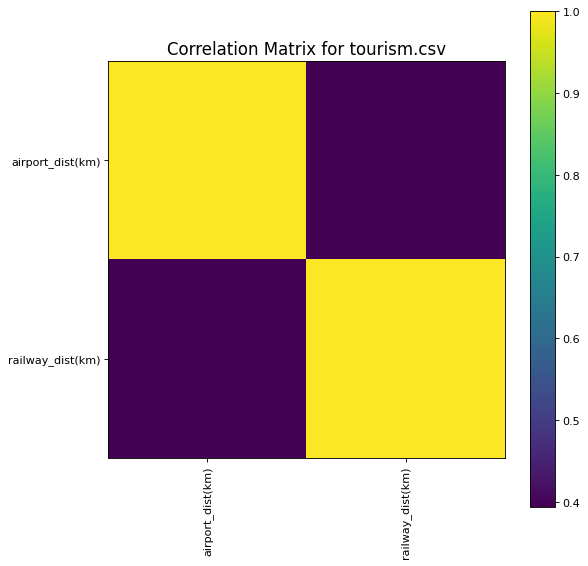

In [8]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

C:\Users\srina\AppData\Local\Temp\ipykernel_8076\2803739303.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


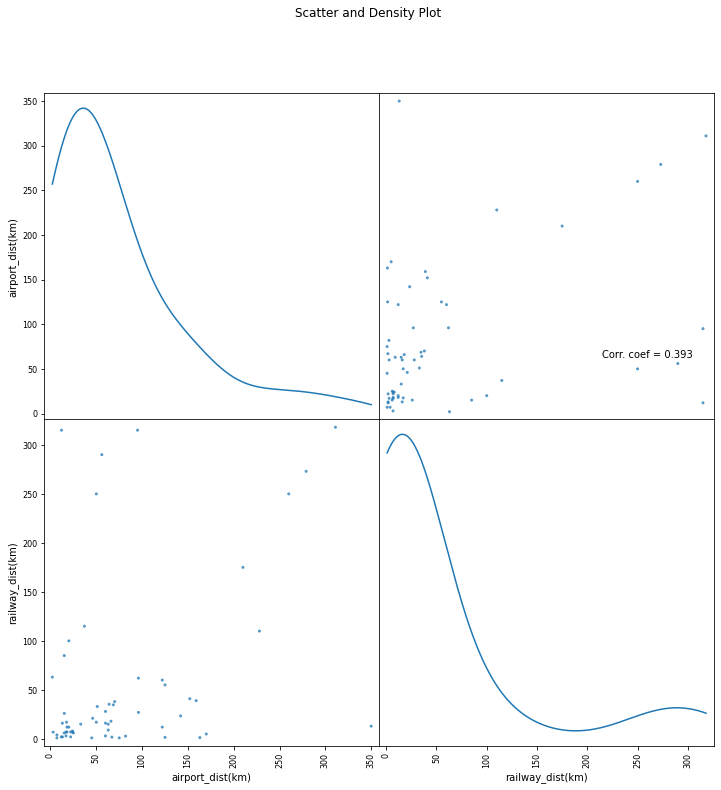

In [9]:
plotScatterMatrix(df1, 12, 10)